In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
#set random seed so each time when code run give same random number
torch.manual_seed(42)

In [52]:
df=pd.read_csv("fashion_train.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,3,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,91,97,80,78,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
997,0,0,0,0,0,0,0,0,0,0,...,197,195,3,0,3,0,0,0,0,3
998,0,0,0,0,0,0,0,0,0,0,...,0,0,180,247,210,0,0,0,0,4


In [11]:
df.head()
df.iloc[:,784]

0      6
1      9
2      9
3      4
4      1
      ..
995    5
996    9
997    3
998    4
999    2
Name: y, Length: 1000, dtype: int64

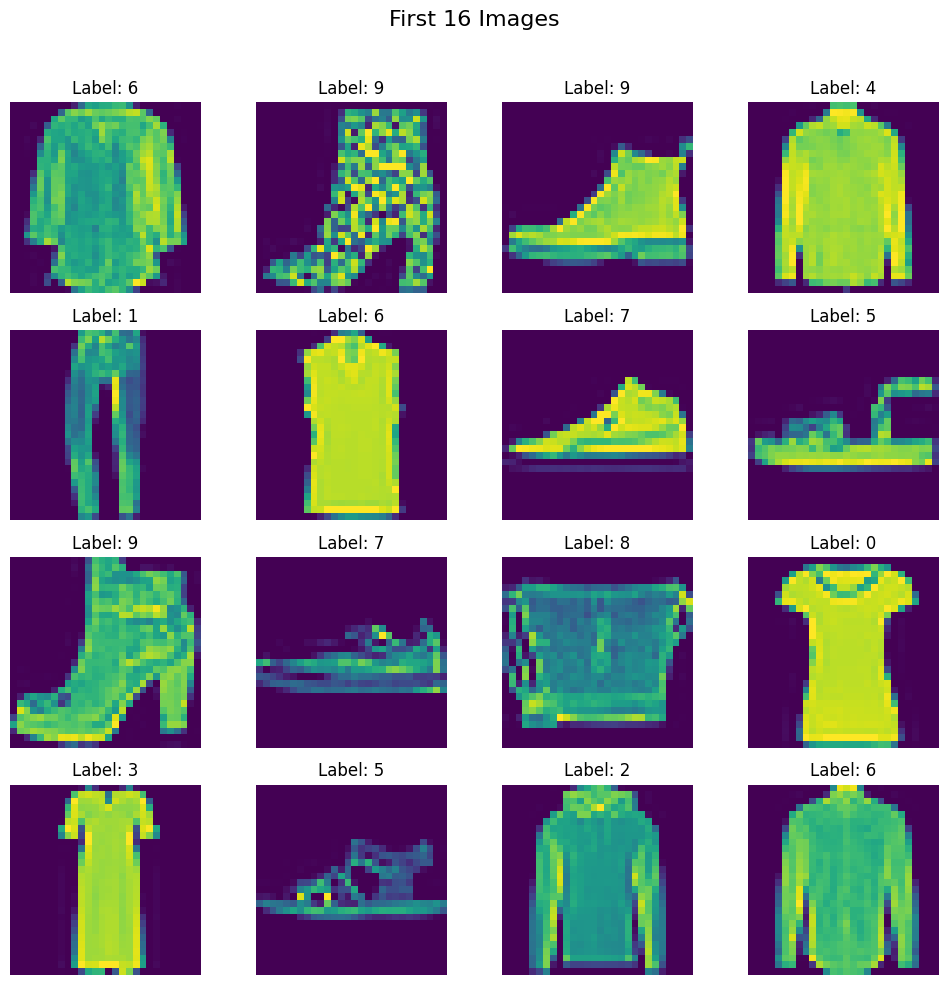

In [14]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 0:784].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 784]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [15]:
X=df.iloc[:,:784]
y=df.iloc[:,784]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train=X_train/255.0
X_testn=X_test/255.0

In [35]:
# X_train=torch.tensor(X_train,dtype=torch.float32)
type(X_train) 

pandas.core.frame.DataFrame

In [57]:
#create CustomDataset Class
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features=torch.tensor(features.values,dtype=torch.float32) # convert dataframe to tensor we will use df[].value
        self.labels=torch.tensor(labels.values,dtype=torch.long)
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self,index):
        return self.features[index],self.labels[index]

In [58]:
y_train.shape

(800,)

In [59]:
# create train dataset
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)


In [60]:
# now create dataloader 
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False) # no need shuffle in test 

In [61]:
## create NN Custom Class
class MyNN(nn.Module):
    def __init__(self,features):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10) #pytorch automatiaclly att softmax method
            
        )
    def forward(self,x):
        return self.model(x)


In [62]:
#set learning rate 
epochs=100
learning_rate=0.1


In [63]:
X_train.shape[1]

784

In [64]:
# intialize model
model=MyNN(X_train.shape[1])
#loss
criteria=nn.CrossEntropyLoss()
#optimizer
optim=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [65]:
# traing loop
for epoch in range(epochs):
    total_epoch_loss=0
    for features,labels in train_loader:
        #forward
        out=model.forward(features)
        #loss
        loss=criteria(out,labels)

        # cal grad or backward but clear gard before for each batch
        optim.zero_grad()
        loss.backward()

        #update para
        optim.step()
        total_epoch_loss=total_epoch_loss+loss.item()
    avg_loss=total_epoch_loss/len(train_loader)

    print(f"Epoch :{epoch} , Loss : {avg_loss}")



Epoch :0 , Loss : 2.168390350341797
Epoch :1 , Loss : 1.6124077081680297
Epoch :2 , Loss : 1.2517171096801758
Epoch :3 , Loss : 1.0963946199417114
Epoch :4 , Loss : 1.008533203601837
Epoch :5 , Loss : 0.8766525316238404
Epoch :6 , Loss : 0.7931662237644196
Epoch :7 , Loss : 0.8012949299812316
Epoch :8 , Loss : 0.7552962744235993
Epoch :9 , Loss : 0.7691821897029877
Epoch :10 , Loss : 0.6736383926868439
Epoch :11 , Loss : 0.6084220373630523
Epoch :12 , Loss : 0.6083106648921967
Epoch :13 , Loss : 0.5869493508338928
Epoch :14 , Loss : 0.5524077689647675
Epoch :15 , Loss : 0.49528524875640867
Epoch :16 , Loss : 0.5121892738342285
Epoch :17 , Loss : 0.5015091872215272
Epoch :18 , Loss : 0.5050088012218475
Epoch :19 , Loss : 0.4230854171514511
Epoch :20 , Loss : 0.44667179226875303
Epoch :21 , Loss : 0.46102317690849304
Epoch :22 , Loss : 0.40288755536079407
Epoch :23 , Loss : 0.4299066865444183
Epoch :24 , Loss : 0.38381349146366117
Epoch :25 , Loss : 0.304834862947464
Epoch :26 , Loss : 0

In [66]:
#model evaluation 
# model.eval  we use this because it help in few cases like in trianing if we use dropout it will work but in evaluation  the dropout will not work and all neurons will active etc 
# or like batch normilization active in train process but in prediction we will not normalize but we will use that mean , SD from traing process that we get.
#simple different behaviour in train and testing 
#but in this code we did not use dropout or normalization but just for rememberance
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [67]:
#evaluation 
total=0
correct=0
with torch.no_grad():
    for features,labels in test_loader:
        #here we will extract labels using max prob values then using that index we will get labels
        out=model.forward(features) # in this we we get (32,10) like each images will get 10 output probibilities and we will get max prob values
        #get max value with label
        _,prediction=torch.max(out,1)
        
        total=total+features.shape[0]
        correct=correct+(prediction==labels).sum().item()
    print(correct/total)


0.765
